### Simulation eines einfachen Pendels

Generierung von Zeitreihen 

https://skill-lync.com/student-projects/python-project-4-solving-second-order-ode-simple-pendulum

In [1]:
'''Python Project 4 : Solving Second Order ODE (Simple Pendulum)'''
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
import csv

rng = np.random.default_rng()

In [2]:
# Time points
t_span = np.linspace(0,20,200)

In [3]:
F = np.zeros_like(t_span)

for n in range(len(F)-1):
    F[n+1] = 0.8 * F[n] +  1 * (rng.random() - 0.5)          

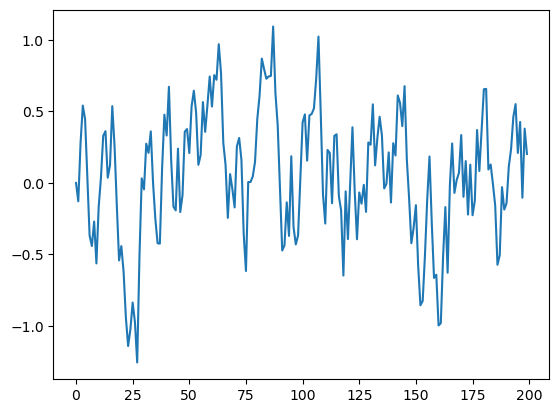

In [4]:
plt.plot(F)

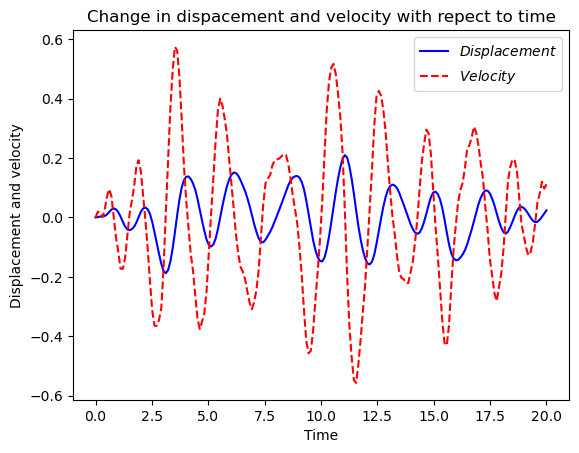

In [5]:
# Define function
def odefunction(theta,t,b,g,l,m):
  # Define solution array theta
  theta1 = theta[0]
  theta2 = theta[1]
  # define both solution equations
  # theta1: Winkel
  # theta2: Drehrate 
  dtheta1_dt = theta2
  dtheta2_dt = -(b/m)*theta2 - (g/1)*math.sin(theta1) + F[int(t*10)-1]/m*math.cos(theta1) 
  # define final solution vector
  dtheta_dt = [dtheta1_dt,dtheta2_dt]
  # Output of Function
  return dtheta_dt

# Input Data
b = 0.5   # Damping Coefficient
g = 9.81   # Acceleration Due to gravity in m/s^2
l = 1      # Length of Pendulum String in meter
m = 1      # Mass in Kg

# Initial condition zero for displacement and 3 for velocity
theta_0 = [0.0,0]

# Solve ODE
result = odeint(odefunction,theta_0,t_span,args=(b,g,l,m))

# Plot Result (Dispalcement and Velocity Change with Time)
plt.plot(t_span,result[:,0],'b-',label=r'$Displacement$')  # Time and displacement plot
plt.plot(t_span,result[:,1],'r--',label=r'$Velocity$')  # Time and velocity plot
plt.ylabel('Displacement and velocity')
plt.xlabel('Time')
plt.legend()
plt.title('Change in dispacement and velocity with repect to time')
plt.show() 

In [6]:
noise_samples = np.zeros_like(t_span)

for n in range(len(F)-1):
    noise_samples[n+1] = 0.0 * noise_samples[n] +  0.2 * (rng.random() - 0.5)  

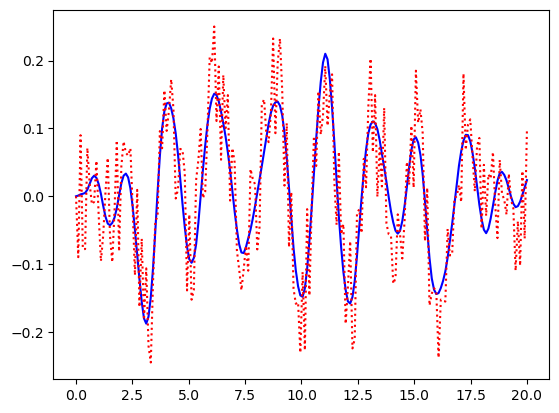

In [9]:
# Messrauschen Positionsmessung
result_noisy = result[:,0] + noise_samples
plt.plot(t_span,result[:,0],'b-',label=r'$Displacement$')# Time and displacement plot
plt.plot(t_span,result_noisy,'r:')# Time and displacement plot

In [11]:
with open('pendulum_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["time","theta_noisy","theta","theta_dot"]
    
    writer.writerow(field)

    for n in range(len(result)):
        writer.writerow([t_span[n],result_noisy[n],result[n,0],result[n,1]])
    
